<a href="https://colab.research.google.com/github/rmcelfresh/DataMiningRCode/blob/master/McElfresh_Lab_61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

McElfresh, Reed  
IST 718: Big Data Analytics--Lab 6




In [1]:
!pip install -q xlrd
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import pystan
import msgpack
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline


You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#Grabbing my GitHub For this assignment
!git clone https://github.com/rmcelfresh/IST718Lab6/

Cloning into 'IST718Lab6'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
ZillowBase = pd.read_csv("http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv", encoding='latin-1')
ZillowBaseBackUp = pd.read_csv("http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv", encoding='latin-1')

In [4]:
#ZHVI is Zillow Home Value Index-- tacks monthy median home values in a particular geographic region

ZillowBase.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [5]:
ZillowBase=ZillowBase.rename({'RegionName':'ZipCode'}, axis='columns')
 
ZillowBase.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


Each Zillow Home Value Index (ZHVI) is a time series tracking the monthly median home value in a particular geographical region. In general, each ZHVI time series begins in April 1996. We generate the ZHVI at seven geographic levels: neighborhood, ZIP code, city, congressional district, county, metropolitan area, state and the nation.

https://www.zillow.com/research/zhvi-methodology-6032/

In [6]:
RegionPivot= pd.pivot_table(ZillowBase, values='2019-03', columns='Metro', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
RegionPivot=pd.DataFrame.transpose(RegionPivot)
#print(RegionPivot)



In [7]:
ARZillow = ZillowBase.loc[ZillowBase['State'] == 'AR']

In [8]:
#ARZillow

In [9]:
ARMetrosZillow = ARZillow.loc[ARZillow['Metro'].isin(['Little Rock-North Little Rock-Conway', 'Searcy', 'Fayetteville-Springdale-Rogers', 'Hot Springs'])]



In [10]:
#ARMetrosZillow

In [11]:
ARPivot= pd.pivot_table(ARMetrosZillow, values=('1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03'), columns='Metro', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
ARPivot=pd.DataFrame.transpose(ARPivot)
(ARPivot)


,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
Metro,,,,,,,,,,,,,,,,,,,,,
Fayetteville-Springdale-Rogers,82552.631579,83236.842105,83921.052632,84557.894737,85031.578947,85321.052632,85431.578947,85368.421053,85200.0,84973.684211,...,176566.666667,177400.000000,178285.714286,179590.476190,181185.714286,182771.428571,183976.190476,184852.380952,185566.666667,186333.333333
Hot Springs,72150.000000,72300.000000,72400.000000,72550.000000,72825.000000,73175.000000,73550.000000,74000.000000,74475.0,75000.000000,...,142900.000000,144125.000000,145100.000000,146000.000000,146625.000000,146875.000000,147400.000000,148050.000000,148050.000000,147900.000000
Little Rock-North Little Rock-Conway,85206.666667,85733.333333,86260.000000,86823.333333,87360.000000,87866.666667,88336.666667,88756.666667,89140.0,89470.000000,...,163043.333333,163540.000000,163873.333333,164376.666667,164986.666667,165723.333333,166263.333333,166596.666667,166736.666667,166706.666667
Searcy,62180.000000,62440.000000,62680.000000,62960.000000,63220.000000,63500.000000,63780.000000,64080.000000,64340.0,64580.000000,...,100933.333333,100866.666667,100600.000000,101066.666667,102666.666667,104533.333333,105633.333333,106300.000000,106683.333333,107133.333333


In [12]:
ARPivot1=pd.DataFrame.transpose(ARPivot)

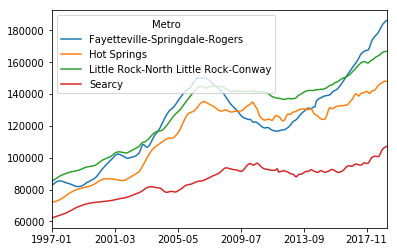

In [13]:
#ARPivot1
from pandas import Series
from matplotlib import pyplot
series = ARPivot1
series.plot()
pyplot.show()

In [14]:
#for col in ARMetrosZillow.columns: 
#    print(col)

In [15]:
to_drop = ['RegionID','City','Metro', 'CountyName']
ZillowBase.drop(columns=to_drop, inplace=True, axis=0)

In [16]:
ZillowBase.head()

,ZipCode,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,60657,IL,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,...,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,77494,TX,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,60614,IL,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,...,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,77449,TX,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,79936,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [17]:
!pip install CensusData
import censusdata

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
Zip65Plus = censusdata.download ('acs5', 2015, censusdata.censusgeo([('zip code tabulation area', '*')]),
                                   ['B01001_001E', 'B01001_020E', 'B01001_021E', 'B01001_022E', 'B01001_023E',
                                    'B01001_024E', 'B01001_025E', 'B01001_044E', 'B01001_045E', 'B01001_046E',
                                    'B01001_047E', 'B01001_048E', 'B01001_049E'])

In [19]:
Zip65Plus.head()

,B01001_001E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E
"ZCTA5 23824: Summary level: 860, zip code tabulation area:23824",6984,83,138,173,60,69,83,107,105,159,147,136,157
"ZCTA5 23827: Summary level: 860, zip code tabulation area:23827",1328,26,28,11,6,1,8,17,7,34,17,6,10
"ZCTA5 23828: Summary level: 860, zip code tabulation area:23828",395,0,9,4,0,1,0,15,2,0,14,19,0
"ZCTA5 23829: Summary level: 860, zip code tabulation area:23829",2652,13,133,60,73,32,22,27,18,17,31,0,9
"ZCTA5 23830: Summary level: 860, zip code tabulation area:23830",1325,44,15,7,37,0,0,57,20,22,24,9,0


In [20]:
ZipCodePop = censusdata.download('acs5', 2015, censusdata.censusgeo([('zip code tabulation area', '*')]),
                                ['B01001_001E', 'B19013_001E', 'B19083_001E',
                                 'C17002_001E', 'C17002_002E', 'C17002_003E', 'C17002_004E',
                                 'B03002_001E', 'B03002_003E', 'B03002_004E', 'B03002_012E',])

In [21]:
#censusdata.printtable(censusdata.censustable('acs5', 2015, 'DP05'))

detail on census data package 
https://jtleider.github.io/censusdata/geographies.html

In [22]:
ZipCodePop.head()

,B01001_001E,B19013_001E,B19083_001E,C17002_001E,C17002_002E,C17002_003E,C17002_004E,B03002_001E,B03002_003E,B03002_004E,B03002_012E
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",724,57500.0,0.3490,724,61,17,88,724,703,0,14
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",67,-666666666.0,0.2345,67,0,0,17,67,67,0,0
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",58,49583.0,0.1728,52,0,0,0,58,58,0,0
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",1282,58176.0,0.4595,1282,27,24,123,1282,1152,36,32
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",1103,60458.0,0.4183,1103,14,145,49,1103,1001,15,6


In [23]:
ZipCodePop =ZipCodePop.rename(columns={'B01001_001E': 'population_size'})
ZipCodePop =ZipCodePop.rename(columns={'B19013_001E': 'median_HH_income'})
ZipCodePop =ZipCodePop.rename(columns={'B19083_001E': 'gini_index'})
ZipCodePop['percent_below_125_poverty'] = (ZipCodePop['C17002_002E'] + ZipCodePop['C17002_003E'] + ZipCodePop['C17002_004E']) / ZipCodePop['C17002_001E'] * 100
ZipCodePop['percent_nonhisp_white'] = ZipCodePop['B03002_003E'] / ZipCodePop['B03002_001E'] * 100
ZipCodePop['percent_nonhisp_black'] = ZipCodePop['B03002_004E'] / ZipCodePop['B03002_001E'] * 100
ZipCodePop['percent_hispanic'] = ZipCodePop['B03002_012E'] / ZipCodePop['B03002_001E'] * 100

In [24]:
for column in ['C17002_001E', 'C17002_002E', 'C17002_003E', 'C17002_004E',
               'B03002_001E', 'B03002_003E', 'B03002_004E', 'B03002_012E',]:
    del ZipCodePop[column]

In [25]:
ZipCodePop.head()

,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971


In [26]:
ZipCodePop.describe()

,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
count,33120.000000,3.215700e+04,3.312000e+04,32601.000000,32810.000000,32810.000000,32810.000000
mean,9664.375151,-2.254584e+07,-1.696860e+07,20.507785,77.639380,7.484919,9.145570
std,14237.949376,1.206529e+08,1.049990e+08,14.021147,25.498529,15.750803,16.589326
min,0.000000,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000
25%,718.750000,3.809500e+04,3.731000e-01,10.847458,67.341856,0.000000,0.604306
50%,2808.000000,4.833300e+04,4.128000e-01,17.899450,88.415623,0.850715,2.908078
75%,13139.250000,6.133900e+04,4.535000e-01,27.031304,96.178344,6.154912,8.990523
max,114982.000000,2.500010e+05,7.898000e-01,100.000000,100.000000,100.000000,100.000000


In [27]:
ZipCodePop['ZipCode']=ZipCodePop.index

In [28]:
ZipCodePop.head()

,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic,ZipCode
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702,"ZCTA5 12810: Summary level: 860, zip code tabu..."
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000,"ZCTA5 12811: Summary level: 860, zip code tabu..."
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000,"ZCTA5 12812: Summary level: 860, zip code tabu..."
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100,"ZCTA5 12814: Summary level: 860, zip code tabu..."
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971,"ZCTA5 12815: Summary level: 860, zip code tabu..."


In [29]:
cols = ZipCodePop.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
ZipCodePop =ZipCodePop[cols]
ZipCodePop.head()

,ZipCode,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810","ZCTA5 12810: Summary level: 860, zip code tabu...",724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811","ZCTA5 12811: Summary level: 860, zip code tabu...",67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812","ZCTA5 12812: Summary level: 860, zip code tabu...",58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814","ZCTA5 12814: Summary level: 860, zip code tabu...",1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815","ZCTA5 12815: Summary level: 860, zip code tabu...",1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971


In [30]:
type(ZipCodePop)

pandas.core.frame.DataFrame

In [31]:
ZipCodePop['ZipCode']= ZipCodePop['ZipCode'].astype(str)

In [32]:
Left = ZipCodePop['ZipCode'].str[6:11]

Left.head()
ZipCodePop['ZipCode']= Left

In [33]:
ZipCodePop.head()

,ZipCode,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",12810,724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",12811,67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",12812,58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",12814,1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",12815,1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971


In [34]:
print(ZipCodePop.dtypes)
print(ZillowBase.dtypes)

ZipCode                       object
population_size                int64
median_HH_income             float64
gini_index                   float64
percent_below_125_poverty    float64
percent_nonhisp_white        float64
percent_nonhisp_black        float64
percent_hispanic             float64
dtype: object
ZipCode       int64
State        object
SizeRank      int64
1996-04     float64
1996-05     float64
1996-06     float64
1996-07     float64
1996-08     float64
1996-09     float64
1996-10     float64
1996-11     float64
1996-12     float64
1997-01     float64
1997-02     float64
1997-03     float64
1997-04     float64
1997-05     float64
1997-06     float64
1997-07     float64
1997-08     float64
1997-09     float64
1997-10     float64
1997-11     float64
1997-12     float64
1998-01     float64
1998-02     float64
1998-03     float64
1998-04     float64
1998-05     float64
1998-06     float64
             ...   
2016-11       int64
2016-12       int64
2017-01       int64
2017-02   

In [35]:
ZipCodePop['ZipCode']= ZipCodePop['ZipCode'].astype(int)
print(ZipCodePop.dtypes)


ZipCode                        int64
population_size                int64
median_HH_income             float64
gini_index                   float64
percent_below_125_poverty    float64
percent_nonhisp_white        float64
percent_nonhisp_black        float64
percent_hispanic             float64
dtype: object


In [36]:
    result = pd.merge(ZillowBase,
                     ZipCodePop[['population_size', 'median_HH_income', 'gini_index', 'percent_below_125_poverty','percent_nonhisp_white', 'percent_nonhisp_black','percent_hispanic','ZipCode']],
                     on='ZipCode', 
                     how='left')

In [37]:
result.head()

,ZipCode,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-02,2019-03,2019-04,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
0,60657,IL,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,...,1057800,1067100,1076100,69147.0,79638.0,0.5041,12.209319,81.562468,2.668229,6.063893
1,77494,TX,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,334000,333400,333200,88077.0,134125.0,0.3454,3.378209,58.166150,6.279733,17.330291
2,60614,IL,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,...,1334600,1340900,1342900,69423.0,92714.0,0.5235,12.329637,80.418593,4.357346,6.675021
3,77449,TX,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,...,183200,182900,181500,106175.0,68854.0,0.3521,17.408529,26.784083,17.734872,48.451142
4,79936,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,128600,128800,128800,113887.0,51784.0,0.4264,21.081177,11.149648,1.540123,85.334586


In [38]:
taxreturnurl = "https://raw.githubusercontent.com/rmcelfresh/IST718Lab6/master/taxreturndata.csv"
taxreturdf = pd.read_csv(taxreturnurl, sep = ",")
                         
taxes=taxreturdf

data from  https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi
non agg.


In [39]:
taxes.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,25,MA,1001,0,8980,5030,2980,850,4980,15160,...,7240,57716,70,61,70,89,1490,4489,7120,16852
1,25,MA,1002,0,9490,5090,3530,750,4620,16220,...,7490,124371,350,478,440,913,2240,11389,6500,20502
2,25,MA,1003,0,170,170,0,0,20,110,...,70,149,0,0,0,0,0,0,160,127
3,25,MA,1005,0,2370,1170,950,210,1270,4400,...,1940,14844,0,0,0,0,450,1388,1860,4703
4,25,MA,1007,0,7580,3490,3330,620,3890,14240,...,6300,71769,150,160,150,121,1370,5167,5860,15787


In [40]:
to_drop = ['STATEFIPS','STATE','AGI_STUB']
taxes.drop(columns=to_drop, inplace=True, axis=0)

In [41]:
taxes=taxes.loc[:, "ZIPCODE":"A00300"] 

In [42]:
taxes['ZipCode']=taxes['ZIPCODE']


/Users/Reed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
taxes.head()

,ZIPCODE,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,...,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,ZipCode
0,1001,8980,5030,2980,850,4980,15160,3910,190,40,...,850,2640,506318,8980,512546,7400,384841,3050,2761,1001
1,1002,9490,5090,3530,750,4620,16220,4130,320,210,...,700,3120,799175,9490,817846,7590,463995,4400,7172,1002
2,1003,170,170,0,0,20,110,0,0,0,...,0,0,2435,170,2474,170,2261,0,0,1003
3,1005,2370,1170,950,210,1270,4400,1240,0,0,...,280,640,137832,2370,139610,2060,107576,870,518,1005
4,1007,7580,3490,3330,620,3890,14240,4090,120,20,...,600,2020,556668,7580,564832,6460,423686,3310,2375,1007


In [44]:
cols = taxes.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
taxes =taxes[cols]
taxes.head()

,ZipCode,ZIPCODE,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,...,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300
0,1001,1001,8980,5030,2980,850,4980,15160,3910,190,...,40,850,2640,506318,8980,512546,7400,384841,3050,2761
1,1002,1002,9490,5090,3530,750,4620,16220,4130,320,...,40,700,3120,799175,9490,817846,7590,463995,4400,7172
2,1003,1003,170,170,0,0,20,110,0,0,...,0,0,0,2435,170,2474,170,2261,0,0
3,1005,1005,2370,1170,950,210,1270,4400,1240,0,...,0,280,640,137832,2370,139610,2060,107576,870,518
4,1007,1007,7580,3490,3330,620,3890,14240,4090,120,...,30,600,2020,556668,7580,564832,6460,423686,3310,2375


In [45]:
to_drop = ['ZIPCODE']
taxes.drop(columns=to_drop, inplace=True, axis=0)
taxes.head()

,ZipCode,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,...,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300
0,1001,8980,5030,2980,850,4980,15160,3910,190,40,...,40,850,2640,506318,8980,512546,7400,384841,3050,2761
1,1002,9490,5090,3530,750,4620,16220,4130,320,210,...,40,700,3120,799175,9490,817846,7590,463995,4400,7172
2,1003,170,170,0,0,20,110,0,0,0,...,0,0,0,2435,170,2474,170,2261,0,0
3,1005,2370,1170,950,210,1270,4400,1240,0,0,...,0,280,640,137832,2370,139610,2060,107576,870,518
4,1007,7580,3490,3330,620,3890,14240,4090,120,20,...,30,600,2020,556668,7580,564832,6460,423686,3310,2375


In [46]:
result2 = pd.merge(result, taxes, on='ZipCode', how='left')

In [47]:
result2.head()

,ZipCode,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300
0,60657,IL,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,...,30.0,3640.0,4520.0,4818920.0,39860.0,4901637.0,35610.0,3590442.0,13770.0,38801.0
1,77494,TX,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,70.0,3830.0,5950.0,5416717.0,41890.0,5467727.0,37520.0,4603255.0,15850.0,19982.0
2,60614,IL,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,...,0.0,2880.0,4510.0,7836352.0,35330.0,7963184.0,30980.0,4355639.0,14140.0,173940.0
3,77449,TX,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,...,480.0,10780.0,5590.0,2275783.0,50660.0,2297923.0,45120.0,2022825.0,4730.0,2535.0
4,79936,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,1000.0,10060.0,7730.0,2058654.0,48980.0,2080256.0,43360.0,1665038.0,7050.0,8072.0


In [51]:
# bash
#!pip install msgpack
#!pip install pystan
#!conda install gcc
!pip install fbprophet
from fbprophet import Prophet


  Using cached https://files.pythonhosted.org/packages/33/fb/ad98d46773929079657706e6b2b6e366ba6c282bc2397d8f9b0ea8e5614c/fbprophet-0.5.tar.gz
  Running setup.py bdist_wheel for fbprophet ... error
  Complete output from command /Users/Reed/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/f8/jn66wpkn2mgc_0qr_n8q4_1w0000gn/T/pip-install-97rwmvwo/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/f8/jn66wpkn2mgc_0qr_n8q4_1w0000gn/T/pip-wheel-sbsh6eg8 --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_861b75c6337e237650a61ae58c4385ef NOW.
  error: command 'gcc' failed with exit status 1
  
  --------------------------------------

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
ZipCodes=['1001',"1002",'1003']
ZipCodes=pd.DataFrame(ZipCodes)

In [ ]:
ZipPivot= pd.pivot_table(ZillowBase, values=('1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'), columns='ZipCode', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
#ARPivot=pd.DataFrame.transpose(ARPivot)
#ZipPivot
#(ARPivot)

In [ ]:
ZipPivot['Period']=ZipPivot.index

In [ ]:
cols = ZipPivot.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
ZipPivot =ZipPivot[cols]
ZipPivot.head()

In [ ]:
ZipPivot['Period'] =  ZipPivot['Period'].astype(str)



In [ ]:
ZipPivot.dtypes
ZipPivot = ZipPivot.reset_index()


In [ ]:
ZipPivot.head()


In [ ]:
OneZip = ZipPivot.iloc[:,1:3]

In [ ]:
Zip2Zip = ZipPivot.iloc[:,[1,3]]

In [ ]:
Zip2Zip.head()

In [ ]:
df=OneZip

In [ ]:
df=df.rename(index=str, columns={"Period": "ds", 1001: "y"})
df=df.rename(index=str, columns={"DS": "ds", 'Y': "y"})


In [ ]:
df.head()

In [ ]:
m = Prophet()
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=12,freq="M")
future.tail()

In [ ]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
forecast

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
ZipPivot.loc[:,1001]

In [ ]:
ZipPivot2= pd.pivot_table(ZillowBase, values=('1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'), columns='ZipCode', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

ZipPivot2=pd.DataFrame.transpose(ZipPivot2)
ZipPivot2.head()

In [ ]:
ZipCodesToProcess=ZipPivot2.index
ZipCodesToProcess1 =  [i for i in ZipCodesToProcess if i < 10000]
ZipCodesToProcess2 =  [i for i in ZipCodesToProcess if i >= 10000 and i < 30000]
ZipCodesToProcess3 =  [i for i in ZipCodesToProcess if i >= 30000 and i < 50000]
ZipCodesToProcess4 =  [i for i in ZipCodesToProcess if i >= 50000 and i < 70000]
ZipCodesToProcess5 =  [i for i in ZipCodesToProcess if i >= 70000 and i < 90000]
ZipCodesToProcess6 =  [i for i in ZipCodesToProcess if i >= 90000 and i < 110000]



In [ ]:
print(len(ZipCodesToProcess1),  "Run1")
print(len(ZipCodesToProcess2),  "Run2")
print(len(ZipCodesToProcess3),  "Run3")
print(len(ZipCodesToProcess4),  "Run4")
print(len(ZipCodesToProcess5),  "Run5")
print(len(ZipCodesToProcess6),  "Run6")



In [ ]:
import csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ExpectedPrice1=[]
ZipCodes=ZipCodesToProcess1


for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12][-1])
    DF201802.append(forecast.iloc[-11][-1])
    DF201803.append(forecast.iloc[-10][-1])
    DF201804.append(forecast.iloc[-9][-1])
    DF201805.append(forecast.iloc[-8][-1])
    DF201806.append(forecast.iloc[-7][-1])
    DF201807.append(forecast.iloc[-6][-1])
    DF201808.append(forecast.iloc[-5][-1])
    DF201809.append(forecast.iloc[-4][-1])
    DF201810.append(forecast.iloc[-3][-1])
    DF201811.append(forecast.iloc[-2][-1])
    ExpectedPrice.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(i)
    filename1 = 'finalized_model1.sav'
    pickle.dump(DF201801, open(filename1, 'wb'))
    filename2 = 'finalized_model2.sav'
    pickle.dump(DF201802, open(filename2, 'wb'))
    filename3 = 'finalized_model3.sav'
    pickle.dump(DF201803, open(filename3, 'wb')) 
    filename4 = 'finalized_model4.sav'
    pickle.dump(DF201804, open(filename4, 'wb'))
    filename5 = 'finalized_model5.sav'
    pickle.dump(DF201805, open(filename5, 'wb'))
    filename6 = 'finalized_model6.sav'
    pickle.dump(DF201806, open(filename6, 'wb'))
    filename7 = 'finalized_model7.sav'
    pickle.dump(DF201807, open(filename7, 'wb'))
    filename8 = 'finalized_model8.sav'
    pickle.dump(DF201808, open(filename8, 'wb'))
    filename9 = 'finalized_model9.sav'
    pickle.dump(DF201809, open(filename9, 'wb'))
    filename10 = 'finalized_model10.sav'
    pickle.dump(DF201810, open(filename10, 'wb'))
    filename11 = 'finalized_model11.sav'
    pickle.dump(DF201811, open(filename11, 'wb'))
    filename12 = 'finalized_model12.sav'
    pickle.dump(ExpectedPrice, open(filename12, 'wb'))
    filename13 = 'finalized_model13.sav'
    pickle.dump(ExpectedPrice1, open(filename13, 'wb'))



In [ ]:
from google.colab import files
files.download("finalized_model1.sav")
files.download("finalized_model2.sav")
files.download("finalized_model3.sav")
files.download("finalized_model4.sav")
files.download("finalized_model5.sav")
files.download("finalized_model6.sav")
files.download("finalized_model7.sav")
files.download("finalized_model8.sav")
files.download("finalized_model9.sav")
files.download("finalized_model10.sav")
files.download("finalized_model11.sav")
files.download("finalized_model12.sav")
files.download("finalized_model13.sav")



In [ ]:
infile = open("finalized_model12.sav",'rb')
new_dict = pickle.load(infile)

In [ ]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ExpectedPrice1=[]
ZipCodes=ZipCodesToProcess2


for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12][-1])
    DF201802.append(forecast.iloc[-11][-1])
    DF201803.append(forecast.iloc[-10][-1])
    DF201804.append(forecast.iloc[-9][-1])
    DF201805.append(forecast.iloc[-8][-1])
    DF201806.append(forecast.iloc[-7][-1])
    DF201807.append(forecast.iloc[-6][-1])
    DF201808.append(forecast.iloc[-5][-1])
    DF201809.append(forecast.iloc[-4][-1])
    DF201810.append(forecast.iloc[-3][-1])
    DF201811.append(forecast.iloc[-2][-1])
    ExpectedPrice.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(i)
    filename1 = 'finalized_model1x.sav'
    pickle.dump(DF201801, open(filename1, 'wb'))
    filename2 = 'finalized_model2x.sav'
    pickle.dump(DF201802, open(filename2, 'wb'))
    filename3 = 'finalized_model3x.sav'
    pickle.dump(DF201803, open(filename3, 'wb')) 
    filename4 = 'finalized_model4x.sav'
    pickle.dump(DF201804, open(filename4, 'wb'))
    filename5 = 'finalized_model5x.sav'
    pickle.dump(DF201805, open(filename5, 'wb'))
    filename6 = 'finalized_model6x.sav'
    pickle.dump(DF201806, open(filename6, 'wb'))
    filename7 = 'finalized_model7x.sav'
    pickle.dump(DF201807, open(filename7, 'wb'))
    filename8 = 'finalized_model8x.sav'
    pickle.dump(DF201808, open(filename8, 'wb'))
    filename9 = 'finalized_model9x.sav'
    pickle.dump(DF201809, open(filename9, 'wb'))
    filename10 = 'finalized_model10x.sav'
    pickle.dump(DF201810, open(filename10, 'wb'))
    filename11 = 'finalized_model11x.sav'
    pickle.dump(DF201811, open(filename11, 'wb'))
    filename12 = 'finalized_model12x.sav'
    pickle.dump(ExpectedPrice, open(filename12, 'wb'))
    filename13 = 'finalized_model13x.sav'
    pickle.dump(ExpectedPrice1, open(filename13, 'wb'))



In [ ]:
files.download("finalized_model1x.sav")
files.download("finalized_model2x.sav")
files.download("finalized_model3x.sav")
files.download("finalized_model4x.sav")
files.download("finalized_model5x.sav")
files.download("finalized_model6x.sav")
files.download("finalized_model7x.sav")
files.download("finalized_model8x.sav")
files.download("finalized_model9x.sav")
files.download("finalized_model10x.sav")
files.download("finalized_model11x.sav")
files.download("finalized_model12x.sav")
files.download("finalized_model13x.sav")


In [ ]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ExpectedPrice1=[]
ZipCodes=ZipCodesToProcess3


for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12][-1])
    DF201802.append(forecast.iloc[-11][-1])
    DF201803.append(forecast.iloc[-10][-1])
    DF201804.append(forecast.iloc[-9][-1])
    DF201805.append(forecast.iloc[-8][-1])
    DF201806.append(forecast.iloc[-7][-1])
    DF201807.append(forecast.iloc[-6][-1])
    DF201808.append(forecast.iloc[-5][-1])
    DF201809.append(forecast.iloc[-4][-1])
    DF201810.append(forecast.iloc[-3][-1])
    DF201811.append(forecast.iloc[-2][-1])
    ExpectedPrice.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(i)
    filename1 = 'finalized_model1y.sav'
    pickle.dump(DF201801, open(filename1, 'wb'))
    filename2 = 'finalized_model2y.sav'
    pickle.dump(DF201802, open(filename2, 'wb'))
    filename3 = 'finalized_model3y.sav'
    pickle.dump(DF201803, open(filename3,'wb')) 
    filename4 = 'finalized_model4y.sav'
    pickle.dump(DF201804, open(filename4, 'wb'))
    filename5 = 'finalized_model5y.sav'
    pickle.dump(DF201805, open(filename5, 'wb'))
    filename6 = 'finalized_model6y.sav'
    pickle.dump(DF201806, open(filename6, 'wb'))
    filename7 = 'finalized_model7y.sav'
    pickle.dump(DF201807, open(filename7, 'wb'))
    filename8 = 'finalized_model8y.sav'
    pickle.dump(DF201808, open(filename8, 'wb'))
    filename9 = 'finalized_model9y.sav'
    pickle.dump(DF201809, open(filename9,'wb'))
    filename10 = 'finalized_model10y.sav'
    pickle.dump(DF201810, open(filename10,'wb'))
    filename11 = 'finalized_model11y.sav'
    pickle.dump(DF201811, open(filename11,'wb'))
    filename12 = 'finalized_model12y.sav'
    pickle.dump(ExpectedPrice, open(filename12,'wb'))
    filename13 = 'finalized_model13y.sav'
    pickle.dump(ExpectedPrice1, open(filename13, 'wb'))


In [ ]:
files.download("finalized_model1y.sav")
files.download("finalized_model2y.sav")
files.download("finalized_model3y.sav")
files.download("finalized_model4y.sav")
files.download("finalized_model5y.sav")
files.download("finalized_model6y.sav")
files.download("finalized_model7y.sav")
files.download("finalized_model8y.sav")
files.download("finalized_model9y.sav")
files.download("finalized_model10y.sav")
files.download("finalized_model11y.sav")
files.download("finalized_model12y.sav")
files.download("finalized_model13y.sav")


In [ ]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ExpectedPrice1=[]
ZipCodes=ZipCodesToProcess4


for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12][-1])
    DF201802.append(forecast.iloc[-11][-1])
    DF201803.append(forecast.iloc[-10][-1])
    DF201804.append(forecast.iloc[-9][-1])
    DF201805.append(forecast.iloc[-8][-1])
    DF201806.append(forecast.iloc[-7][-1])
    DF201807.append(forecast.iloc[-6][-1])
    DF201808.append(forecast.iloc[-5][-1])
    DF201809.append(forecast.iloc[-4][-1])
    DF201810.append(forecast.iloc[-3][-1])
    DF201811.append(forecast.iloc[-2][-1])
    ExpectedPrice.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(i)
    filename1 = 'finalized_model1z.sav'
    pickle.dump(DF201801, open(filename1, 'wb'))
    filename2 = 'finalized_model2z.sav'
    pickle.dump(DF201802, open(filename2, 'wb'))
    filename3 = 'finalized_model3z.sav'
    pickle.dump(DF201803, open(filename3, 'wb')) 
    filename4 = 'finalized_model4z.sav'
    pickle.dump(DF201804, open(filename4, 'wb'))
    filename5 = 'finalized_model5z.sav'
    pickle.dump(DF201805, open(filename5, 'wb'))
    filename6 = 'finalized_model6z.sav'
    pickle.dump(DF201806, open(filename6, 'wb'))
    filename7 = 'finalized_model7z.sav'
    pickle.dump(DF201807, open(filename7, 'wb'))
    filename8 = 'finalized_model8z.sav'
    pickle.dump(DF201808, open(filename8, 'wb'))
    filename9 = 'finalized_model9z.sav'
    pickle.dump(DF201809, open(filename9, 'wb'))
    filename10 = 'finalized_model10z.sav'
    pickle.dump(DF201810, open(filename10, 'wb'))
    filename11 = 'finalized_model11z.sav'
    pickle.dump(DF201811, open(filename11, 'wb'))
    filename12 = 'finalized_model12z.sav'
    pickle.dump(ExpectedPrice, open(filename12, 'wb'))
    filename13 = 'finalized_model13z.sav'
    pickle.dump(ExpectedPrice1, open(filename13, 'wb'))



In [ ]:
files.download("finalized_model1z.sav")
files.download("finalized_model2z.sav")
files.download("finalized_model3z.sav")
files.download("finalized_model4z.sav")
files.download("finalized_model5z.sav")
files.download("finalized_model6z.sav")
files.download("finalized_model7z.sav")
files.download("finalized_model8z.sav")
files.download("finalized_model9z.sav")
files.download("finalized_model10z.sav")
files.download("finalized_model11z.sav")
files.download("finalized_model12z.sav")
files.download("finalized_model13z.sav")


In [ ]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ExpectedPrice1=[]
ZipCodes=ZipCodesToProcess5


for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12][-1])
    DF201802.append(forecast.iloc[-11][-1])
    DF201803.append(forecast.iloc[-10][-1])
    DF201804.append(forecast.iloc[-9][-1])
    DF201805.append(forecast.iloc[-8][-1])
    DF201806.append(forecast.iloc[-7][-1])
    DF201807.append(forecast.iloc[-6][-1])
    DF201808.append(forecast.iloc[-5][-1])
    DF201809.append(forecast.iloc[-4][-1])
    DF201810.append(forecast.iloc[-3][-1])
    DF201811.append(forecast.iloc[-2][-1])
    ExpectedPrice.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(i)
    filename1 = 'finalized_model1r.sav'
    pickle.dump(DF201801, open(filename1, 'wb'))
    filename2 = 'finalized_model2r.sav'
    pickle.dump(DF201802, open(filename2, 'wb'))
    filename3 = 'finalized_model3r.sav'
    pickle.dump(DF201803, open(filename3, 'wb')) 
    filename4 = 'finalized_model4r.sav'
    pickle.dump(DF201804, open(filename4, 'wb'))
    filename5 = 'finalized_model5r.sav'
    pickle.dump(DF201805, open(filename5, 'wb'))
    filename6 = 'finalized_model6r.sav'
    pickle.dump(DF201806, open(filename6, 'wb'))
    filename7 = 'finalized_model7r.sav'
    pickle.dump(DF201807, open(filename7, 'wb'))
    filename8 = 'finalized_model8r.sav'
    pickle.dump(DF201808, open(filename8, 'wb'))
    filename9 = 'finalized_model9r.sav'
    pickle.dump(DF201809, open(filename9, 'wb'))
    filename10 = 'finalized_model10r.sav'
    pickle.dump(DF201810, open(filename10, 'wb'))
    filename11 = 'finalized_model11r.sav'
    pickle.dump(DF201811, open(filename11, 'wb'))
    filename12 = 'finalized_model12r.sav'
    pickle.dump(ExpectedPrice, open(filename12, 'wb'))
    filename13 = 'finalized_model13r.sav'
    pickle.dump(ExpectedPrice1, open(filename13, 'wb'))


In [ ]:
files.download("finalized_model1r.sav")
files.download("finalized_model2r.sav")
files.download("finalized_model3r.sav")
files.download("finalized_model4r.sav")
files.download("finalized_model5r.sav")
files.download("finalized_model6r.sav")
files.download("finalized_model7r.sav")
files.download("finalized_model8r.sav")
files.download("finalized_model9r.sav")
files.download("finalized_model10r.sav")
files.download("finalized_model11r.sav")
files.download("finalized_model12r.sav")
files.download("finalized_model13r.sav")


In [ ]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ExpectedPrice1=[]
ZipCodes=ZipCodesToProcess6


for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12][-1])
    DF201802.append(forecast.iloc[-11][-1])
    DF201803.append(forecast.iloc[-10][-1])
    DF201804.append(forecast.iloc[-9][-1])
    DF201805.append(forecast.iloc[-8][-1])
    DF201806.append(forecast.iloc[-7][-1])
    DF201807.append(forecast.iloc[-6][-1])
    DF201808.append(forecast.iloc[-5][-1])
    DF201809.append(forecast.iloc[-4][-1])
    DF201810.append(forecast.iloc[-3][-1])
    DF201811.append(forecast.iloc[-2][-1])
    ExpectedPrice.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(forecast.iloc[-1][-1]) 
    ExpectedPrice1.append(i)
    filename1 = 'finalized_model1s.sav'
    pickle.dump(DF201801, open(filename1, 'wb'))
    filename2 = 'finalized_model2s.sav'
    pickle.dump(DF201802, open(filename2, 'wb'))
    filename3 = 'finalized_model3s.sav'
    pickle.dump(DF201803, open(filename3, 'wb')) 
    filename4 = 'finalized_model4s.sav'
    pickle.dump(DF201804, open(filename4, 'wb'))
    filename5 = 'finalized_model5s.sav'
    pickle.dump(DF201805, open(filename5, 'wb'))
    filename6 = 'finalized_model6s.sav'
    pickle.dump(DF201806, open(filename6, 'wb'))
    filename7 = 'finalized_model7s.sav'
    pickle.dump(DF201807, open(filename7, 'wb'))
    filename8 = 'finalized_model8s.sav'
    pickle.dump(DF201808, open(filename8, 'wb'))
    filename9 = 'finalized_model9s.sav'
    pickle.dump(DF201809, open(filename9, 'wb'))
    filename10 = 'finalized_model10s.sav'
    pickle.dump(DF201810, open(filename10, 'wb'))
    filename11 = 'finalized_model11s.sav'
    pickle.dump(DF201811, open(filename11, 'wb'))
    filename12 = 'finalized_model12s.sav'
    pickle.dump(ExpectedPrice, open(filename12, 'wb'))
    filename13 = 'finalized_model13s.sav'
    pickle.dump(ExpectedPrice1, open(filename13, 'wb'))



In [ ]:
files.download("finalized_model1s.sav")
files.download("finalized_model2s.sav")
files.download("finalized_model3s.sav")
files.download("finalized_model4s.sav")
files.download("finalized_model5s.sav")
files.download("finalized_model6s.sav")
files.download("finalized_model7s.sav")
files.download("finalized_model8s.sav")
files.download("finalized_model9s.sav")
files.download("finalized_model10s.sav")
files.download("finalized_model11s.sav")
files.download("finalized_model12s.sav")
files.download("finalized_model13s.sav")
